In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Workshop.csv")

In [ ]:
df.head()

,Unnamed: 0,id,starttime,day,ecgi,cuid,plr_cuid,duid,plr_cellid,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
0,0,650154,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728705,3,0,0,3,0.0,0.0,0.0,0.0,0,0
1,1,650172,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728450,0,2,2,0,0.0,0.0,0.0,0.0,0,0
2,2,650157,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728450,2,2,0,0,0.0,0.0,0.0,0.0,0,0
3,3,637337,2021-10-28 07:20:00,2021-10-28 00:00:00,2708756710728193,0,1,1,0,0.0,0.0,0.0,0.0,0,0
4,4,637314,2021-10-28 07:20:00,2021-10-28 00:00:00,2708756710728193,1,1,0,0,0.0,0.0,0.0,0.0,0,0


In [ ]:
# get rid of irrelevant columns, and save it into a new dataframe x
x = df.drop(['Unnamed: 0','id','cuid','plr_cuid','duid','plr_cellid','min5_volte_downlink_packet_loss_rate','min5_volte_uplink_packet_loss_rate'], axis = 1)

In [ ]:
# create a dataframe with only packet lost rate
y=x.drop(['min5_average_pdcp_sdu_delay_dl',	'min5_average_pdcp_sdu_drop_rate_dl'], axis = 1)

In [ ]:
y.head()

,starttime,day,ecgi,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul
0,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728705,0.0,0.0
1,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728450,0.0,0.0
2,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728450,0.0,0.0
3,2021-10-28 07:20:00,2021-10-28 00:00:00,2708756710728193,0.0,0.0
4,2021-10-28 07:20:00,2021-10-28 00:00:00,2708756710728193,0.0,0.0


In [ ]:
y.isnull().sum()

starttime                         0
day                               0
ecgi                              0
min5_pdcp_packets_lost_rate_dl    0
min5_pdcp_packets_lost_rate_ul    0
dtype: int64

In [ ]:
y['starttime']=pd.to_datetime(y['starttime'])

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   starttime                       90936 non-null  datetime64[ns]
 1   day                             90936 non-null  object        
 2   ecgi                            90936 non-null  int64         
 3   min5_pdcp_packets_lost_rate_dl  90936 non-null  float64       
 4   min5_pdcp_packets_lost_rate_ul  90936 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 3.5+ MB


In [ ]:
y['starttime'].dt.month

NameError: ignored

In [ ]:
y['month']=y['starttime'].dt.month

In [ ]:
y['year']=y['starttime'].dt.year

In [ ]:
y['date']=y['starttime'].dt.day

In [ ]:
y['hour']=y['starttime'].dt.hour

In [ ]:
y['minute']=y['starttime'].dt.minute

In [ ]:
y['second']=y['starttime'].dt.second

In [ ]:
y.head()

,starttime,day,ecgi,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,month,year,date,hour,minute,second
0,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728705,0.0,0.0,11,2021,1,1,10,0
1,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728450,0.0,0.0,11,2021,1,1,10,0
2,2021-11-01 01:10:00,2021-11-01 00:00:00,2708756710728450,0.0,0.0,11,2021,1,1,10,0
3,2021-10-28 07:20:00,2021-10-28 00:00:00,2708756710728193,0.0,0.0,10,2021,28,7,20,0
4,2021-10-28 07:20:00,2021-10-28 00:00:00,2708756710728193,0.0,0.0,10,2021,28,7,20,0


In [ ]:
y=y.drop(['starttime','day'],axis=1)

In [ ]:
y.head()

,ecgi,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,month,year,date,hour,minute,second
0,2708756710728705,0.0,0.0,11,2021,1,1,10,0
1,2708756710728450,0.0,0.0,11,2021,1,1,10,0
2,2708756710728450,0.0,0.0,11,2021,1,1,10,0
3,2708756710728193,0.0,0.0,10,2021,28,7,20,0
4,2708756710728193,0.0,0.0,10,2021,28,7,20,0


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ecgi                            90936 non-null  int64  
 1   min5_pdcp_packets_lost_rate_dl  90936 non-null  float64
 2   min5_pdcp_packets_lost_rate_ul  90936 non-null  float64
 3   month                           90936 non-null  int64  
 4   year                            90936 non-null  int64  
 5   date                            90936 non-null  int64  
 6   hour                            90936 non-null  int64  
 7   minute                          90936 non-null  int64  
 8   second                          90936 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 6.2 MB


In [ ]:
y['ecgi'].astype('category')

0        2708756710728705
1        2708756710728450
2        2708756710728450
3        2708756710728193
4        2708756710728193
               ...       
90931    2708756710728707
90932    2708756710728707
90933    2708756710728707
90934    2708756710728707
90935    2708756710728707
Name: ecgi, Length: 90936, dtype: category
Categories (9, int64): [2708756710728193, 2708756710728194, 2708756710728195, 2708756710728449, ...,
                        2708756710728451, 2708756710728705, 2708756710728706, 2708756710728707]

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ecgi                            90936 non-null  int64  
 1   min5_pdcp_packets_lost_rate_dl  90936 non-null  float64
 2   min5_pdcp_packets_lost_rate_ul  90936 non-null  float64
 3   month                           90936 non-null  int64  
 4   year                            90936 non-null  int64  
 5   date                            90936 non-null  int64  
 6   hour                            90936 non-null  int64  
 7   minute                          90936 non-null  int64  
 8   second                          90936 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 6.2 MB


In [ ]:
y['ecgi']=y['ecgi'].astype('category')

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ecgi                            90936 non-null  category
 1   min5_pdcp_packets_lost_rate_dl  90936 non-null  float64 
 2   min5_pdcp_packets_lost_rate_ul  90936 non-null  float64 
 3   month                           90936 non-null  int64   
 4   year                            90936 non-null  int64   
 5   date                            90936 non-null  int64   
 6   hour                            90936 non-null  int64   
 7   minute                          90936 non-null  int64   
 8   second                          90936 non-null  int64   
dtypes: category(1), float64(2), int64(6)
memory usage: 5.6 MB


In [ ]:
y.isnull().sum()

ecgi                              0
min5_pdcp_packets_lost_rate_dl    0
min5_pdcp_packets_lost_rate_ul    0
month                             0
year                              0
date                              0
hour                              0
minute                            0
second                            0
dtype: int64

In [ ]:
pd.get_dummies(y)

,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,month,year,date,hour,minute,second,ecgi_2708756710728193,ecgi_2708756710728194,ecgi_2708756710728195,ecgi_2708756710728449,ecgi_2708756710728450,ecgi_2708756710728451,ecgi_2708756710728705,ecgi_2708756710728706,ecgi_2708756710728707
0,0.000000,0.0,11,2021,1,1,10,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.0,11,2021,1,1,10,0,0,0,0,0,1,0,0,0,0
2,0.000000,0.0,11,2021,1,1,10,0,0,0,0,0,1,0,0,0,0
3,0.000000,0.0,10,2021,28,7,20,0,1,0,0,0,0,0,0,0,0
4,0.000000,0.0,10,2021,28,7,20,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,0.000000,0.0,10,2021,18,0,55,0,0,0,0,0,0,0,0,0,1
90932,0.107359,0.0,10,2021,18,1,5,0,0,0,0,0,0,0,0,0,1
90933,0.107359,0.0,10,2021,18,1,5,0,0,0,0,0,0,0,0,0,1
90934,0.000000,0.0,10,2021,18,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=pd.get_dummies(y)

In [ ]:
y.isnull().sum()

min5_pdcp_packets_lost_rate_dl    0
min5_pdcp_packets_lost_rate_ul    0
month                             0
year                              0
date                              0
hour                              0
minute                            0
second                            0
ecgi_2708756710728193             0
ecgi_2708756710728194             0
ecgi_2708756710728195             0
ecgi_2708756710728449             0
ecgi_2708756710728450             0
ecgi_2708756710728451             0
ecgi_2708756710728705             0
ecgi_2708756710728706             0
ecgi_2708756710728707             0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()


In [ ]:
data_scaled=pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

In [ ]:
data_scaled

,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,month,year,date,hour,minute,second,ecgi_2708756710728193,ecgi_2708756710728194,ecgi_2708756710728195,ecgi_2708756710728449,ecgi_2708756710728450,ecgi_2708756710728451,ecgi_2708756710728705,ecgi_2708756710728706,ecgi_2708756710728707
0,-0.157851,-0.164262,7.304454,0.0,-4.523103,-1.477008,-1.009316,0.0,-0.301012,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,2.447496,-0.356283,-0.441589
1,-0.157851,-0.164262,7.304454,0.0,-4.523103,-1.477008,-1.009316,0.0,-0.301012,-0.330565,-0.298768,-0.342632,2.803208,-0.332649,-0.408581,-0.356283,-0.441589
2,-0.157851,-0.164262,7.304454,0.0,-4.523103,-1.477008,-1.009316,0.0,-0.301012,-0.330565,-0.298768,-0.342632,2.803208,-0.332649,-0.408581,-0.356283,-0.441589
3,-0.157851,-0.164262,-0.136903,0.0,0.912811,-0.616758,-0.430237,0.0,3.322128,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,-0.408581,-0.356283,-0.441589
4,-0.157851,-0.164262,-0.136903,0.0,0.912811,-0.616758,-0.430237,0.0,3.322128,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,-0.408581,-0.356283,-0.441589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,-0.157851,-0.164262,-0.136903,0.0,-1.100490,-1.620383,1.596540,0.0,-0.301012,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,-0.408581,-0.356283,2.264548
90932,5.301418,-0.164262,-0.136903,0.0,-1.100490,-1.477008,-1.298856,0.0,-0.301012,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,-0.408581,-0.356283,2.264548
90933,5.301418,-0.164262,-0.136903,0.0,-1.100490,-1.477008,-1.298856,0.0,-0.301012,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,-0.408581,-0.356283,2.264548
90934,-0.157851,-0.164262,-0.136903,0.0,-1.100490,-1.477008,-1.588395,0.0,-0.301012,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,-0.408581,-0.356283,2.264548


In [ ]:
#importing PCA and TSNE


In [ ]:
#from sklearn.decomposition import PCA


In [ ]:
#from sklearn.manifold import TSNE

In [ ]:
"""
#the t#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(random_state=1,n_components=2) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data
"""

In [ ]:
#data_pca1.head()

,0,1
0,-215.221492,-0.462323
1,39.778114,-0.468102
2,39.778114,-0.468102
3,296.780436,0.588919
4,296.780436,0.588919


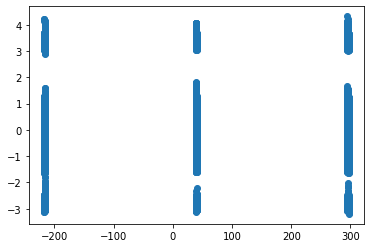

In [ ]:
#plt.scatter(data_pca1[0],data_pca1[1])

In [ ]:
from sklearn.cluster import KMeans

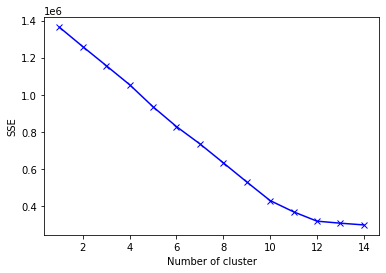

In [ ]:

# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()



In [ ]:

#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)


In [ ]:

n = 3

kmeans = KMeans(n_clusters = n, max_iter = 2000, random_state=1) #Apply the K-Means algorithm
kmeans.fit(data_scaled) #Fit the kmeans function on the scaled data

#Adding predicted labels to the original data and scaled data 

labels = kmeans.predict(data_scaled)
data_scaled_copy['Labels'] = labels #Save the predictions on the scaled data from K-Means
y['Labels'] = labels #Save the predictions on the scaled data from K-Means


In [ ]:
data_scaled_copy.head()

,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,month,year,date,hour,minute,second,ecgi_2708756710728193,ecgi_2708756710728194,ecgi_2708756710728195,ecgi_2708756710728449,ecgi_2708756710728450,ecgi_2708756710728451,ecgi_2708756710728705,ecgi_2708756710728706,ecgi_2708756710728707,Labels
0,-0.157851,-0.164262,7.304454,0.0,-4.523103,-1.477008,-1.009316,0.0,-0.301012,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,2.447496,-0.356283,-0.441589,2
1,-0.157851,-0.164262,7.304454,0.0,-4.523103,-1.477008,-1.009316,0.0,-0.301012,-0.330565,-0.298768,-0.342632,2.803208,-0.332649,-0.408581,-0.356283,-0.441589,0
2,-0.157851,-0.164262,7.304454,0.0,-4.523103,-1.477008,-1.009316,0.0,-0.301012,-0.330565,-0.298768,-0.342632,2.803208,-0.332649,-0.408581,-0.356283,-0.441589,0
3,-0.157851,-0.164262,-0.136903,0.0,0.912811,-0.616758,-0.430237,0.0,3.322128,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,-0.408581,-0.356283,-0.441589,1
4,-0.157851,-0.164262,-0.136903,0.0,0.912811,-0.616758,-0.430237,0.0,3.322128,-0.330565,-0.298768,-0.342632,-0.356734,-0.332649,-0.408581,-0.356283,-0.441589,1


In [ ]:
#data_pca1['label']=labels

In [ ]:
import seaborn as sns

In [ ]:
y.head()

,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,month,year,date,hour,minute,second,ecgi_2708756710728193,ecgi_2708756710728194,ecgi_2708756710728195,ecgi_2708756710728449,ecgi_2708756710728450,ecgi_2708756710728451,ecgi_2708756710728705,ecgi_2708756710728706,ecgi_2708756710728707,Labels
0,0.0,0.0,11,2021,1,1,10,0,0,0,0,0,0,0,1,0,0,2
1,0.0,0.0,11,2021,1,1,10,0,0,0,0,0,1,0,0,0,0,0
2,0.0,0.0,11,2021,1,1,10,0,0,0,0,0,1,0,0,0,0,0
3,0.0,0.0,10,2021,28,7,20,0,1,0,0,0,0,0,0,0,0,1
4,0.0,0.0,10,2021,28,7,20,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
y.to_csv('kmeansclustering_new.csv',index=False)

In [ ]:
sns.scatterplot

In [ ]:
sns.scatterplot(data_pca1[0],data_pca1[1],hue='label',data=data_pca1)

NameError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   starttime                           90936 non-null  datetime64[ns]
 1   day                                 90936 non-null  object        
 2   ecgi                                90936 non-null  int64         
 3   min5_average_pdcp_sdu_delay_dl      90936 non-null  float64       
 4   min5_average_pdcp_sdu_drop_rate_dl  90936 non-null  float64       
 5   min5_pdcp_packets_lost_rate_dl      90936 non-null  float64       
 6   min5_pdcp_packets_lost_rate_ul      90936 non-null  float64       
 7   month                               90936 non-null  int64         
 8   year                                90936 non-null  int64         
 9   date                                90936 non-null  int64         
 10  hour                  

In [ ]:
data.to_csv('kmeansclustering.csv',index=False)

In [ ]:
data_scaled

,ecgi,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,starttime_2021-10-18 00:05:00,starttime_2021-10-18 00:10:00,starttime_2021-10-18 00:15:00,starttime_2021-10-18 00:20:00,starttime_2021-10-18 00:25:00,...,day_2021-10-23 00:00:00,day_2021-10-24 00:00:00,day_2021-10-25 00:00:00,day_2021-10-26 00:00:00,day_2021-10-27 00:00:00,day_2021-10-28 00:00:00,day_2021-10-29 00:00:00,day_2021-10-30 00:00:00,day_2021-10-31 00:00:00,day_2021-11-01 00:00:00
0,216.0,-0.238252,-0.014825,-0.157851,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,-0.253699,-0.252863,-0.25392,-0.226378,7.304454
1,-39.0,-0.238252,-0.014825,-0.157851,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,-0.253699,-0.252863,-0.25392,-0.226378,7.304454
2,-39.0,-0.238252,-0.014825,-0.157851,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,-0.253699,-0.252863,-0.25392,-0.226378,7.304454
3,-296.0,-0.238252,-0.014825,-0.157851,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,3.941678,-0.252863,-0.25392,-0.226378,-0.136903
4,-296.0,-0.238252,-0.014825,-0.157851,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,3.941678,-0.252863,-0.25392,-0.226378,-0.136903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,218.0,-0.238252,-0.014825,-0.157851,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,-0.253699,-0.252863,-0.25392,-0.226378,-0.136903
90932,218.0,-0.238252,-0.014825,5.301418,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,-0.253699,-0.252863,-0.25392,-0.226378,-0.136903
90933,218.0,0.606891,-0.014825,5.301418,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,-0.253699,-0.252863,-0.25392,-0.226378,-0.136903
90934,218.0,-0.238252,-0.014825,-0.157851,-0.164262,-0.01755,-0.012409,-0.01755,-0.008774,-0.01755,...,-0.2946,-0.29879,-0.304043,-0.261634,-0.213208,-0.253699,-0.252863,-0.25392,-0.226378,-0.136903


In [ ]:
data_scaled.columns

Index(['ecgi', 'min5_average_pdcp_sdu_delay_dl',
       'min5_average_pdcp_sdu_drop_rate_dl', 'min5_pdcp_packets_lost_rate_dl',
       'min5_pdcp_packets_lost_rate_ul', 'starttime_2021-10-18 00:05:00',
       'starttime_2021-10-18 00:10:00', 'starttime_2021-10-18 00:15:00',
       'starttime_2021-10-18 00:20:00', 'starttime_2021-10-18 00:25:00',
       ...
       'day_2021-10-23 00:00:00', 'day_2021-10-24 00:00:00',
       'day_2021-10-25 00:00:00', 'day_2021-10-26 00:00:00',
       'day_2021-10-27 00:00:00', 'day_2021-10-28 00:00:00',
       'day_2021-10-29 00:00:00', 'day_2021-10-30 00:00:00',
       'day_2021-10-31 00:00:00', 'day_2021-11-01 00:00:00'],
      dtype='object', length=4162)

In [ ]:
#from sklearn.manifold import TSNE

In [ ]:
"""
tsne = TSNE(random_state = 1)  #Apply the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled,y=data_scaled_copy['Labels']) #Fit and transform tsne function on the scaled data
"""

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
#data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
#sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

In [ ]:
#sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=df.ecgi)


In [ ]:
#from sklearn.mixture import GaussianMixture

In [ ]:
"""
n = 3 
gmm = GaussianMixture(n_components = n , random_state=1) #Apply the Gaussian Mixture algorithm
gmm.fit(data_scaled) #Fit the gmm function on the scaled data

gmmlabels = gmm.predict(data_scaled)
data_scaled_copy['GmmLabels'] = gmmlabels
data['GmmLabels'] = gmmlabels
"""

"\nn = 3 \ngmm = GaussianMixture(n_components = n , random_state=1) #Apply the Gaussian Mixture algorithm\ngmm.fit(data_scaled) #Fit the gmm function on the scaled data\n\ngmmlabels = gmm.predict(data_scaled)\ndata_scaled_copy['GmmLabels'] = gmmlabels\ndata['GmmLabels'] = gmmlabels\n"

In [ ]:
#sns.scatterplot(data_pca1[0],data_pca1[1],hue='label',data=data_pca1)

In [ ]:
#from sklearn.cluster import DBSCAN

In [ ]:
#import seaborn as sns

In [ ]:
#clustering = DBSCAN(eps=3, min_samples=2).fit(data_pca1)

In [ ]:
#sns.scatterplot(data_pca1[0],data_pca1[1],hue=clustering.labels_)

In [ ]:
p8iuyj  §"""
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(support_fraction=1., contamination=0.261)
clf.fit_predict(data_pca1['min5_average_pdcp_sdu_delay_dl',	'min5_average_pdcp_sdu_drop_rate_dl',	'min5_pdcp_packets_lost_rate_dl',	'min5_pdcp_packets_lost_rate_ul'])


SyntaxError: ignored